In [1]:
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
import pandas_datareader.data as web
import pandas as pd
from pandas.tseries.frequencies import to_offset
import numpy as np
import datetime

In [3]:
data=[10000,20000,30000]
Series=pd.Series(data,)
Series

0    10000
1    20000
2    30000
dtype: int64

In [4]:
data=[10000,20000,30000]
index=['月','火','水']
series=pd.Series(data,index=index,name='価格')
series.index.name='曜日'
series

曜日
月    10000
火    20000
水    30000
Name: 価格, dtype: int64

In [5]:
data=[[1,10000],[2,20000],[3,30000]]
index=['月','火','水']
frame=pd.DataFrame(data,index=index,columns=['個数','価格'])
frame.index.name='曜日'
frame

,個数,価格
曜日,,
月,1,10000
火,2,20000
水,3,30000


In [6]:
print('＊　Seriesのhead2つ分')
print(Series.head(2))
print('＊　DataFrameのtail2つ分')
print(frame.tail(2))

＊　Seriesのhead2つ分
0    10000
1    20000
dtype: int64
＊　DataFrameのtail2つ分
    個数     価格
曜日           
火    2  20000
水    3  30000


In [7]:
from datetime import datetime
dates=[datetime(2023,1,2),datetime(2023,1,5),datetime(2023,1,7)]
ts=pd.Series(np.random.standard_normal(3),index=dates,name='終値')
ts.index.name='Date'
print(ts)
tsd=pd.DataFrame(np.random.standard_normal((3,4)),\
                 index=dates,columns=['始値','高値','安値','終値'])
tsd.index.name='DATE'
tsd

Date
2023-01-02    0.319415
2023-01-05    0.255061
2023-01-07    3.250405
Name: 終値, dtype: float64


,始値,高値,安値,終値
DATE,,,,
2023-01-02,-0.216767,-1.830135,0.833458,0.912990
2023-01-05,0.526449,0.357920,-0.984164,-0.721162
2023-01-07,-0.591373,-0.129309,-0.328787,0.263324


In [8]:
start,end="1949/5/16","2025/12/31"
Nikkei225 = web.DataReader("NIKKEI225", 'fred',start,end)
Nikkei225.tail(3),type(Nikkei225),type(Nikkei225.index),\
Nikkei225.loc['2022-12-30 00:00:00']

(            NIKKEI225
 DATE                 
 2025-11-14   50376.53
 2025-11-17   50323.91
 2025-11-18   48702.98,
 pandas.core.frame.DataFrame,
 pandas.core.indexes.datetimes.DatetimeIndex,
 NIKKEI225    26094.5
 Name: 2022-12-30 00:00:00, dtype: float64)

In [9]:
pd.options.display.precision = 2
N225 = pd.read_csv('^N225.csv',index_col=0,parse_dates=True).dropna()
N225.head(3),type(N225),type(N225.index)

(               Open     High      Low    Close  Adj Close  Volume
 Date                                                             
 1970-01-05  2402.85  2402.85  2402.85  2402.85    2402.85     0.0
 1970-01-06  2406.22  2406.22  2406.22  2406.22    2406.22     0.0
 1970-01-07  2394.96  2394.96  2394.96  2394.96    2394.96     0.0,
 pandas.core.frame.DataFrame,
 pandas.core.indexes.datetimes.DatetimeIndex)

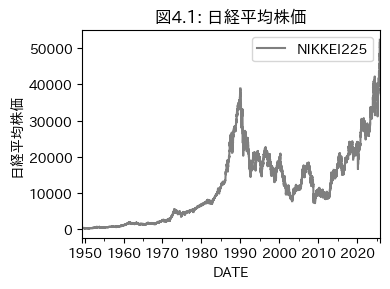

In [10]:
Nikkei225.plot(alpha=0.5,color='black',figsize=(4, 3))
plt.ylabel('日経平均株価')
plt.title("図4.1: 日経平均株価")
plt.tight_layout()
plt.show()

In [11]:
fx = web.DataReader('DEXJPUS',"fred",start,end)
port=Nikkei225.copy()
port['DEXJPUS']=fx
port.tail(3)

,NIKKEI225,DEXJPUS
DATE,,
2025-11-14,50376.53,154.64
2025-11-17,50323.91,NaN
2025-11-18,48702.98,NaN


In [12]:
print("* 4.2.1.の例")
print(ts['2023/1/2'])
print("* 4.2.2の例")
print(port["2022-01-04":"2022-01-07"])
print("* 4.2.2の数式の例")
print(port[port['NIKKEI225']>38500].index)
print("* 4.2.3のlocの例")
port_after1990=port.loc["1990-01-04":]
print(port_after1990.loc["1990-01"])
print("* 4.2.4のilocの例")
print(port.iloc[-2:])
port.index[0]

* 4.2.1.の例
0.3194147699351875
* 4.2.2の例
            NIKKEI225  DEXJPUS
DATE                          
2022-01-04   29301.79   116.12
2022-01-05   29332.16   115.91
2022-01-06   28487.87   115.78
2022-01-07   28478.56   115.61
* 4.2.2の数式の例
DatetimeIndex(['1989-12-18', '1989-12-20', '1989-12-26', '1989-12-27',
               '1989-12-28', '1989-12-29', '1990-01-04', '2024-02-22',
               '2024-02-26', '2024-02-27',
               ...
               '2025-11-05', '2025-11-06', '2025-11-07', '2025-11-10',
               '2025-11-11', '2025-11-12', '2025-11-13', '2025-11-14',
               '2025-11-17', '2025-11-18'],
              dtype='datetime64[ns]', name='DATE', length=274, freq=None)
* 4.2.3のlocの例
            NIKKEI225  DEXJPUS
DATE                          
1990-01-04   38712.88   143.37
1990-01-05   38274.76   143.82
1990-01-08   38294.96   144.10
1990-01-09   37951.46   145.20
1990-01-10   37696.50   145.25
1990-01-11   38170.13   145.40
1990-01-12   37516.77   145.40
1990

Timestamp('1949-05-16 00:00:00')

In [13]:
port.iloc[-2:,0:]

,NIKKEI225,DEXJPUS
DATE,,
2025-11-17,50323.91,NaN
2025-11-18,48702.98,NaN


In [14]:
Nikkei225.asof("2022-12-28")

NIKKEI225    26340.5
Name: 2022-12-28 00:00:00, dtype: float64

In [15]:
port=pd.concat([Nikkei225,fx],axis=1)#.dropna()
print(port.head())
port=port.dropna()
print(port[:1])
print(port[-1:])

            NIKKEI225  DEXJPUS
DATE                          
1949-05-16     176.21      NaN
1949-05-17     174.80      NaN
1949-05-18     172.53      NaN
1949-05-19     171.34      NaN
1949-05-20     169.20      NaN
            NIKKEI225  DEXJPUS
DATE                          
1971-01-04    2001.34   357.73
            NIKKEI225  DEXJPUS
DATE                          
2025-11-14   50376.53   154.64


In [16]:
port=port.drop('DEXJPUS',axis=1)
print(port.head(2))

            NIKKEI225
DATE                 
1971-01-04    2001.34
1971-01-05    1989.44


In [17]:
port=port.drop('1971-01-04',axis=0)
print(port.head(2))

            NIKKEI225
DATE                 
1971-01-05    1989.44
1971-01-06    1981.74


In [18]:
print(N225.iloc[:,0:3].resample('ME').last().tail(1))
print(N225.loc["2022-12"].iloc[-1:,0:3])

               Open      High       Low
Date                                   
2022-12-31  26288.0  26321.37  26067.92
               Open      High       Low
Date                                   
2022-12-30  26288.0  26321.37  26067.92


In [19]:
print(N225.iloc[:,0:3].resample('ME').first().tail(1))
print(N225.loc["2022-12"].iloc[:1,0:3])

                Open      High       Low
Date                                    
2022-12-31  28273.13  28423.46  28226.08
                Open      High       Low
Date                                    
2022-12-01  28273.13  28423.46  28226.08


In [20]:
port1 = Nikkei225.iloc[:,0:4].resample('ME').last()
print(port1.tail(1))
port1.index = port1.index + to_offset("1d")
print(port1.tail(1))

            NIKKEI225
DATE                 
2025-11-30   48702.98
            NIKKEI225
DATE                 
2025-12-01   48702.98


In [21]:
tsd=Nikkei225.dropna().pct_change()
print("データ数 ",tsd.count().iloc[0])
print("平均",tsd.mean().iloc[0])
print("標準偏差",tsd.std().iloc[0])
print("歪度",tsd.skew().iloc[0])
print("尖度(0)",tsd.kurt().iloc[0])

データ数  18999
平均 0.0003729489179723257
標準偏差 0.012399440024320415
歪度 -0.14464477263752298
尖度(0) 9.615774263332696


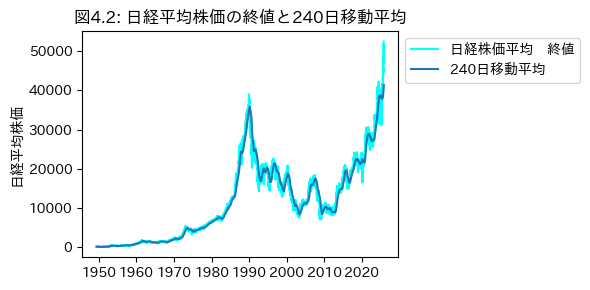

In [22]:
fig= plt.figure(figsize=(6,3))
ax = fig.add_subplot(1, 1, 1)
plt.plot(Nikkei225,color='cyan',label='日経株価平均　終値')
plt.plot(Nikkei225.rolling("240d").mean(),label='240日移動平均')
plt.ylabel('日経平均株価')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("図4.2: 日経平均株価の終値と240日移動平均")
plt.tight_layout()
plt.show()

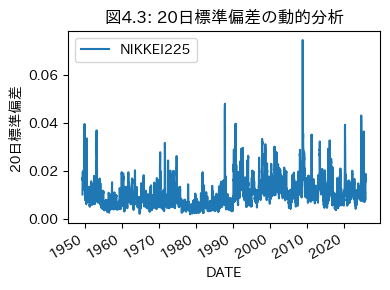

In [23]:
Nikkei225.dropna().pct_change().rolling(20).std().plot(figsize=(4, 3))
plt.ylabel('20日標準偏差')
plt.title("図4.3: 20日標準偏差の動的分析")
plt.tight_layout()
plt.show()

In [24]:
index=pd.date_range(start="2023/1/1",periods=1000000,freq="min")
from numpy.random import default_rng
rng=default_rng()
rnd=rng.standard_normal((1000000,4))
frame=pd.DataFrame(rnd,index=index)
start_now=datetime.now()
print("itterows")
for a,b in frame.iterrows():
    date=a
    o=b[0]
    h=b[1]
    l=b[2]
    c=b[3]
print(datetime.now()-start_now,'-----------------------') 
start_now=datetime.now()
print("itteturples")
for b in frame.itertuples():
    o=b[1]
    h=b[2]
    l=b[3]
    c=b[4]
print(datetime.now()-start_now,'-----------------------') 

itterows
0:00:32.011314 -----------------------
itteturples
0:00:01.628946 -----------------------


In [25]:
start_now=datetime.now()
print("numpy array")
for b in rnd:
    o=b[0]
    h=b[1]
    l=b[2]
    c=b[3]
print(datetime.now()-start_now,'-----------------------') 
rndlist=rnd.tolist()
start_now=datetime.now()
print("list")
for b in rndlist:
    o=b[0]
    h=b[1]
    l=b[2]
    c=b[3]
print(datetime.now()-start_now,'-----------------------') 

numpy array
0:00:00.357388 -----------------------
list
0:00:00.156229 -----------------------


In [26]:
start_now=datetime.now()
print("arange + numpy array")
for i in np.arange(len(rnd)):
    o=rnd[i][0]
    h=rnd[i][1]
    l=rnd[i][2]
    c=rnd[i][3]
print(datetime.now()-start_now,'-----------------------') 

start_now=datetime.now()
print("range+list")
for b in range(len(rndlist)):
    o=rndlist[i][0]
    h=rndlist[i][1]
    l=rndlist[i][2]
    c=rndlist[i][3]
print(datetime.now()-start_now,'-----------------------') 

arange + numpy array
0:00:00.816075 -----------------------
range+list
0:00:00.297598 -----------------------


In [27]:
df = pd.DataFrame(
    {"釣り人": ["花子", "花子", "花子", "花子","次郎", "次郎", "次郎"],
     "釣った魚": ["ハゼ", "ハゼ", "セイゴ", "セイゴ","ハゼ", "ハゼ", "セイゴ"],
     "大きさ": ["小", "大", "小","小", "大", "小", "大"],
     "釣った数": [1, 2, 2, 3, 4, 5, 6],
     "釣りに費やした時間": [2, 4, 5, 6, 6, 8, 9]})
print("表4.3：ディズニーランドができる前の行徳での遊び")
df

表4.3：ディズニーランドができる前の行徳での遊び


,釣り人,釣った魚,大きさ,釣った数,釣りに費やした時間
0,花子,ハゼ,小,1,2
1,花子,ハゼ,大,2,4
2,花子,セイゴ,小,2,5
3,花子,セイゴ,小,3,6
4,次郎,ハゼ,大,4,6
5,次郎,ハゼ,小,5,8
6,次郎,セイゴ,大,6,9


In [28]:
table = pd.pivot_table(
    df,
    values=['釣った数','釣りに費やした時間'], 
    index=['釣り人', '釣った魚'],
    columns=['大きさ'],
    aggfunc="mean"   # ← 文字列で指定
)

print('表4.4: 魚釣りの成果')
table

表4.4: 魚釣りの成果


釣った数      釣りに費やした時間     
大きさ         大    小         大    小
釣り人 釣った魚                         
次郎  セイゴ   6.0  NaN       9.0  NaN
    ハゼ    4.0  5.0       6.0  8.0
花子  セイゴ   NaN  2.5       NaN  5.5
    ハゼ    2.0  1.0       4.0  2.0

# 必要に応じてインストールしてください。インストールするときにはこのセルをcodeに切り換えてください。
!pip install seaborn


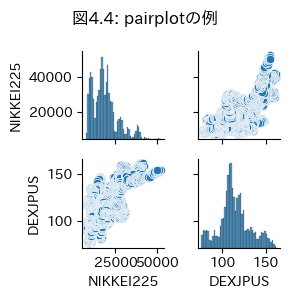

In [29]:
import seaborn as sns
a=sns.pairplot(port_after1990,height=1.5, aspect=1)
a.fig.suptitle("図4.4: pairplotの例")
plt.tight_layout()  
plt.show()

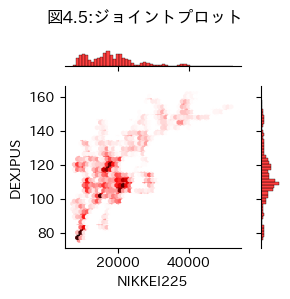

In [30]:
a=sns.jointplot(x=port_after1990.NIKKEI225,\
                y=port_after1990.DEXJPUS,kind="hex", color="r",height=3)
a.fig.suptitle("図4.5:ジョイントプロット")
plt.tight_layout()  
plt.show()

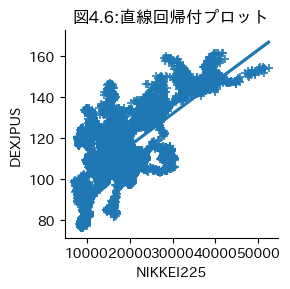

In [31]:
sns.lmplot(data=port_after1990,x="NIKKEI225",y="DEXJPUS",
           height=3,aspect=1,markers='+')
plt.title("図4.6:直線回帰付プロット")
plt.tight_layout() 
plt.show()

In [32]:
tsd = web.DataReader("DEXJPUS", 'fred', "2019/1/1", "2022/12/31")

# ① pct_change の FutureWarning 回避（fill_method を明示）
tsd = tsd.pct_change(fill_method=None).dropna() * 100

# ② 列名を fx に統一（ここが抜けると 'fx' の KeyError）
tsd.columns = ['fx']

# ③ 年・月列を追加
tsd['year']  = tsd.index.year
tsd['month'] = tsd.index.month

# ④ pivot_table の FutureWarning 回避（aggfunc を文字列で指定）
r = tsd.pivot_table(
    index="month",
    columns="year",
    values="fx",
    aggfunc="mean"
)

# 表示設定
pd.options.display.precision = 2
pd.set_option('display.float_format', lambda x: '%.2f' % x)

r.T

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2019,-0.02,0.13,-0.03,0.03,-0.12,-0.04,0.00,-0.09,0.11,-0.01,0.07,-0.05
2020,0.01,-0.02,-0.02,-0.02,0.03,0.00,-0.09,0.00,0.01,-0.04,0.00,-0.07
2021,0.11,0.06,0.16,-0.05,0.02,0.07,-0.03,0.01,0.04,0.05,0.05,0.07
2022,-0.04,0.00,0.23,0.32,-0.10,0.23,-0.12,0.18,0.11,0.13,-0.28,-0.29


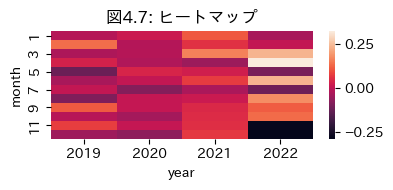

In [33]:
fig, ax = plt.subplots(figsize=(4, 2))
sns.heatmap(r,ax=ax)
plt.title("図4.7: ヒートマップ")
plt.tight_layout()  
plt.show()

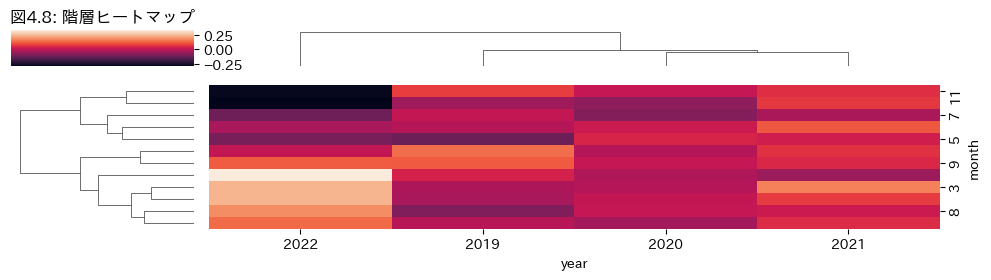

In [34]:
sns.clustermap(r,figsize=(10, 3))
plt.title("図4.8: 階層ヒートマップ")
plt.tight_layout()
plt.savefig('0408.jpeg',dpi=600)
plt.show()

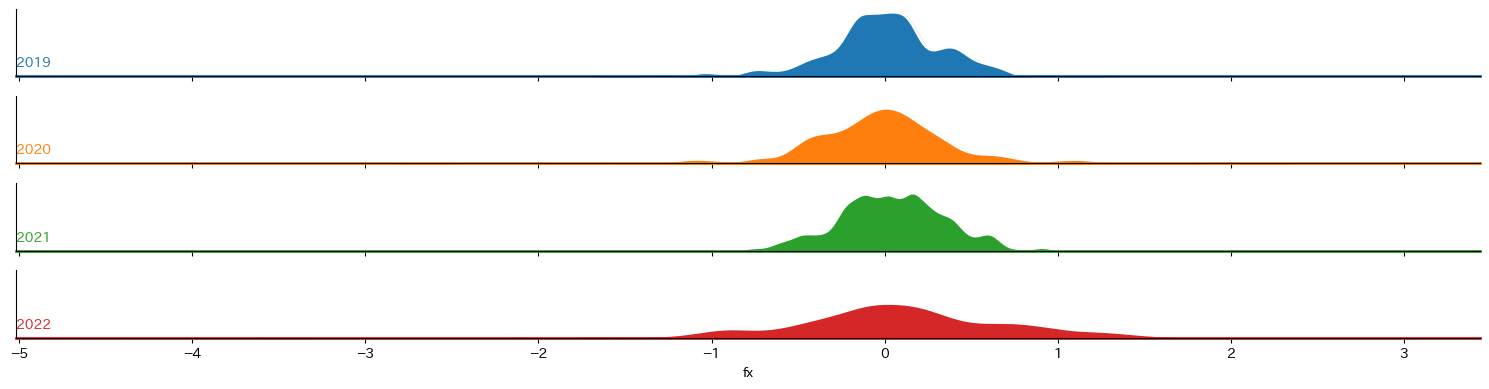

In [35]:
yy=np.array([str(y) for y in tsd.index.year])
tsd["year"]=yy
tsd.drop('month',axis=1)
# FacetGrid オブジェクトの初期化
g = sns.FacetGrid(tsd, row="year", hue="year", aspect=15, height=1)
# 密度の描画
g.map(sns.kdeplot, "fx",bw_adjust=.5, clip_on=False,fill=True, alpha=1, 
      linewidth=1.5)
g.map(sns.kdeplot, "fx", clip_on=False, color="w", lw=2, bw_adjust=.5)
# hueマッピングを用いてrefline()に色を渡す
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
def label(x, color, label):# 適切な軸の範囲を指定
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "fx")
g.figure.subplots_adjust(hspace=-.15)
g.set_titles('')
g.set(yticks=[], ylabel="")
plt.tight_layout()  
plt.show()